# Análisis de datos de un test de 10km
## Tres corredores:
### Atleta A: Marco Vidoz
### Atleta B: Jaime Moyano
### Atleta C: Gabriel Rueda
Prueba realizada sobre el circuito de costanera, Bariloche Río Negro.
Circuito con subidas y bajadas (+50m)
Objetivo: Medir el rendimiento y estado físico actual de c/u.
Resultado de Tiempos: 36:35 (A), 35:48(B), 35:48(C)


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
v12 = 3.75 #vel para convertir a km/h
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts    
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

def f_correct(y, i1,i2,y2):
    #Corrige los datos en el array y entre los indices i1 e i2 de acuerdo o proporcional a y2.
    #Esta función se utiliza para corregir puntos cuando el reloj pierde señal o tiene outliers, speaks o missing data
    z =np.copy(y) 
    n = np.linspace(0, i2-i1,len(y[i1:i2]))
    h2 = y[i2]
    h1 = y[i1]
    y2 = y2 - np.mean(y2[i1:i2])
    z[i1:i2] = (h2-h1)/(i2-i1)*n +h1 + y2[i1:i2]
    return z


In [3]:
#Datos Altleta C
var = ["grade_adjusted_speed","velocity_smooth","cadence","distance","heartrate","time"]

f = open("gpx_rueda.txt", "r")
data_0 = f.readline()
dire = {} #diccionario con las variables y los indices importantes
#la clave es el nombre de la variable en str
for k in var:
    i = data_0.index(k)
    dire[k] = [i,len(k),data_0.index('[',i),data_0.index(']',i)]   

data_1 = pd.DataFrame() #data frame donde se almacenan los datos con clave y valor
j=0
for k in dire: 
    l = []
    l = [float(i) for i in data_0[dire[k][2]+1:dire[k][3]].split(',')]
    data_1[k] = np.array(l)
    j+= 1
    
#Edición de parametros 
data_1["distance"] = data_1["distance"]/1000 #de metros a kilometros 
data_1["cadence"] = data_1["cadence"]*2 #el archivo tiene en vuelta (2 pasos x vuelta.  
data_1["velocity_smooth"] = data_1["velocity_smooth"]*v12 
#El heart rate perdio señal, se corrije proporcional a Velocidad.
#El reloj del corredor C adquirió mal la frecuencia cardiacia en los indices 810-94 y 1230-1244
heartrate = f_correct(np.array(data_1["heartrate"]),200,560,np.array(data_1["velocity_smooth"]))
heartrate = f_correct(heartrate,810,904,np.array(data_1["velocity_smooth"]))
heartrate = f_correct(heartrate,1230,1244,np.array(data_1["velocity_smooth"]))
#Se vuelve a almacenar en el data frame original
data_1["heartrate"] = heartrate

In [4]:
#Datos atleta A
f2 = open("gpx_vidoz.txt", "r")
data_2 = f2.readline()
dire2 = {} #diccionario con las variables y los indices importantes
#la clave es el nombre de la variable en str
for k in var:
    #print(k)
    i = data_2.index(k)
    dire2[k] = [i,len(k),data_2.index('[',i),data_2.index(']',i)]
    
data_3 = pd.DataFrame()
j=0
for k in dire: 
    l = []
    l = [float(i) for i in data_2[dire2[k][2]+1:dire2[k][3]].split(',')]
    data_3[k] = np.array(l)
    j+= 1    

#Edición de archivos
data_3["distance"] = data_3["distance"]/1680 #de metros a kilometros
 
data_3["cadence"] = np.array(data_3["cadence"]*2) #el archivo tiene en vuelta (2 pasos x vuelta.  
data_3["velocity_smooth"] = data_3["velocity_smooth"]*v12 
   #Se vuelve a almacenar en el data frame original
v_corr = f_correct(np.array(data_3["velocity_smooth"]),450,655,1/180*np.array(data_3["cadence"]))
v_corr = f_correct(v_corr,1750,2100,1/180*np.array(data_3["cadence"]))
v_corr = f_correct(v_corr,3100,3600,1/180*np.array(data_3["cadence"]))
data_3["velocity_smooth"] = v_corr
   
#El heart rate perdio señal, se corrije proporcional a Velocidad
heartrate = np.array(data_3["heartrate"]) #,200,560,np.array(data_1["velocity_smooth"]))
heartrate[0:1200] =heartrate[0:1200]-(np.mean(heartrate[0:1200])-np.mean(heartrate[1200:1700])) 
heartrate = f_correct(heartrate,500,660,np.array(data_3["velocity_smooth"]))
heartrate = f_correct(heartrate,1700,2150,np.array(data_3["velocity_smooth"]))
heartrate = f_correct(heartrate,2950,3600,np.array(data_3["velocity_smooth"]))
#Se vuelve a almacenar en el data frame original
data_3["heartrate"] = heartrate
      
#Se vuelve a almacenar en el data frame original
c_corr = f_correct(np.array(data_3["cadence"]),400,700,np.array(data_3["velocity_smooth"]))
c_corr = f_correct(c_corr,1750,2100,1/180*np.array(data_3["velocity_smooth"]))
c_corr = f_correct(c_corr,3100,3600,1/180*np.array(data_3["velocity_smooth"]))
data_3["cadence"] = c_corr      

In [6]:
#Datos Atleta B      
f2 = open("gpx_moyano.txt", "r")
data_2 = f2.readline()
dire2 = {} #diccionario con las variables y los indices importantes
#la clave es el nombre de la variable en str
for k in var:
    #print(k)
    i = data_2.index(k)
    dire2[k] = [i,len(k),data_2.index('[',i),data_2.index(']',i)]
    
data_4 = pd.DataFrame()
j=0
for k in dire: 
    l = []
    l = [float(i) for i in data_2[dire2[k][2]+1:dire2[k][3]].split(',')]
    data_4[k] = np.array(l[0:2150])
    j+= 1    
    
data_4["distance"] = data_4["distance"]/1000 #de metros a kilometros 
data_4["cadence"] = data_4["cadence"]*2 #el archivo tiene en vuelta (2 pasos x vuelta.  
data_4["velocity_smooth"] = data_4["velocity_smooth"]*v12 

##  Se compara la velocidad vs distancia de los tres atletas

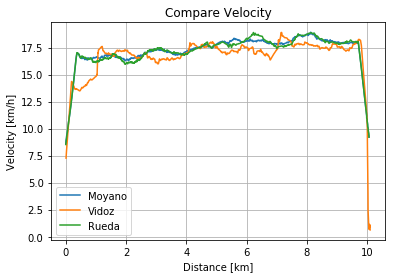

In [7]:
plt.figure(1)
N1 = 150
plt.title("Compare Velocity")
plt.plot(data_4["distance"],smooth(data_4["velocity_smooth"],N1),label="Moyano")
plt.plot(data_3["distance"],smooth(data_3["velocity_smooth"],N1),label="Vidoz")
plt.plot(data_1["distance"],smooth(data_1["velocity_smooth"],N1),label="Rueda")
plt.xlabel('Distance [km]')
plt.ylabel("Velocity [km/h]")
plt.legend()
plt.grid()
plt.show()

In [8]:
#Marco, Jaime y Gabi declaran tener velocidad "cercana a la VAM" 
names = ["Vidoz", "Moyano","Rueda"]
#VAM = [3:12, 3:03,3:08]
V_10min = 20-np.array([12,3,8])/12 #km/h 

#V_10K_Personal Best = [3:33, 3:26,3:27] (Pista2019, CIpolletti2019, Velodromo2019)
V_10k = 20-np.array([33,26,27])/12
FC10k_avg = [184,177,172]
FC10k_max = [195,193,191]
P_Best = pd.DataFrame()
P_Best["parametros"] = ["V_10min","V_10K", "FC_Average_10k","FC_Max_10k"]
j = 0
for i in names:
    P_Best[i] = np.array([V_10min[j],V_10k[j],FC10k_avg[j],FC10k_max[j]])
    j +=1

P_Best.head()

,parametros,Vidoz,Moyano,Rueda
0,V_10min,19.00,19.750000,19.333333
1,V_10K,17.25,17.833333,17.750000
2,FC_Average_10k,184.00,177.000000,172.000000
3,FC_Max_10k,195.00,193.000000,191.000000


# Datos Personales:
- Velocidad en 10min [km/h]---> (Puede ser muy cercano a su VAM)
- Marca personal en 10 K [km/h], todas en 2019
- Frecuencia promedio cuando realizaron su Personal best de 10k
- Frecuencia Máxima cuando realizaron su Personal best de 10k


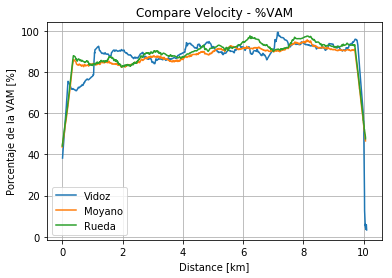

In [9]:

V_VAM_A = np.array(100 - (P_Best["Vidoz"][0]-np.array(data_3["velocity_smooth"]))/P_Best["Vidoz"][0]*100)
V_VAM_B = np.array(100 - (P_Best["Moyano"][0]-np.array(data_4["velocity_smooth"]))/P_Best["Moyano"][0]*100)
V_VAM_C = np.array(100 - (P_Best["Rueda"][0]-np.array(data_1["velocity_smooth"]))/P_Best["Rueda"][0]*100)


 
plt.figure(2)
N1 = 150
plt.title("Compare Velocity - %VAM")
ax1 = plt.plot(data_3["distance"],smooth(V_VAM_A,N1),label="Vidoz")
plt.plot(data_4["distance"],smooth(V_VAM_B,N1),label="Moyano")
plt.plot(data_1["distance"],smooth(V_VAM_C,N1),label="Rueda")
plt.xlabel('Distance [km]')
plt.ylabel("Porcentaje de la VAM [%]")
plt.legend()
plt.grid()
#ax1.set_ylim(60,110)
plt.show()

# Comparación en los primeros 5k:
 Cuánto se exigió c/u con respecto a su VAM

In [10]:
V05_A = round(np.mean(V_VAM_A[0:int(len(V_VAM_A)/2)]),2)
V05_B = round(np.mean(V_VAM_B[0:int(len(V_VAM_B)/2)]),2)
V05_C = round(np.mean(V_VAM_C[0:int(len(V_VAM_C)/2)]),2)

print("El atleta A corrió los primeros 5K a un ", V05_A,"% de su VAM")
print("El atleta B corrió los primeros 5K a un ", V05_B,"% de su VAM")
print("El atleta C corrió los primeros 5K a un ", V05_C,"% de su VAM")


El atleta A corrió los primeros 5K a un  86.62 % de su VAM
El atleta B corrió los primeros 5K a un  85.71 % de su VAM
El atleta C corrió los primeros 5K a un  87.04 % de su VAM


# Comparación en los segundos 5k:
Cuánto se exigió c/u con respecto a su VAM

In [11]:
V05_A = round(np.mean(V_VAM_A[int(len(V_VAM_A)/2):-1]),2)
V05_B = round(np.mean(V_VAM_B[int(len(V_VAM_B)/2):-1]),2)
V05_C = round(np.mean(V_VAM_C[int(len(V_VAM_C)/2):-1]),2)

print("El atleta A corrió los segundos 5K a un ", V05_A,"% de su VAM")
print("El atleta B corrió los segundos 5K a un ", V05_B,"% de su VAM")
print("El atleta C corrió los segundos 5K a un ", V05_C,"% de su VAM")

El atleta A corrió los segundos 5K a un  77.18 % de su VAM
El atleta B corrió los segundos 5K a un  91.76 % de su VAM
El atleta C corrió los segundos 5K a un  93.66 % de su VAM


# Comparación en Frecuencia Cardiaca
Frecuencia promedio cuando realizaron su Personal best de 10k 

Vidoz: 184

Moyano: 177

Rueda: 172

Frecuencia Máxima medida 

Vidoz: 195

Moyano: 193

Rueda: 191

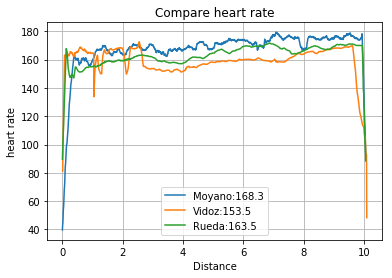

In [12]:
## Se compara la frec cardiaca de los tres atletas
plt.figure(2)
N2 = 50
plt.title("Compare heart rate")
plt.plot(data_4["distance"],smooth(data_4["heartrate"],N2),label="Moyano:"+str(round(np.mean(data_4["heartrate"]),1)))
plt.plot(data_3["distance"],smooth(data_3["heartrate"],N2),label="Vidoz:"+str(round(np.mean(data_3["heartrate"]),1)))
plt.plot(data_1["distance"],smooth(data_1["heartrate"],N2),label="Rueda:"+str(round(np.mean(data_1["heartrate"]),1)))
plt.xlabel('Distance')
plt.ylabel("heart rate")
plt.legend()
plt.grid()
plt.show()

## Creo que el sensor del Atleta Vidoz midió mal la señal de heart rate en los primeros 2km. Parece demasiado eleveda.
De todos modos strava, tiene otro valor en función de la distancia, como que está más arriba

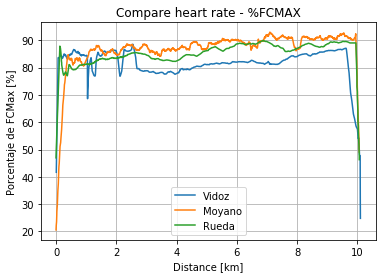

In [14]:
V_VAM_A = np.array(100 - (P_Best["Vidoz"][3]-np.array(data_3["heartrate"]))/P_Best["Vidoz"][3]*100)
V_VAM_B = np.array(100 - (P_Best["Moyano"][3]-np.array(data_4["heartrate"]))/P_Best["Moyano"][3]*100)
V_VAM_C = np.array(100 - (P_Best["Rueda"][3]-np.array(data_1["heartrate"]))/P_Best["Rueda"][3]*100)

 
plt.figure(2)
N1 = 50
plt.title("Compare heart rate - %FCMAX")
ax1 = plt.plot(data_3["distance"],smooth(V_VAM_A,N1),label="Vidoz")
plt.plot(data_4["distance"],smooth(V_VAM_B,N1),label="Moyano")
plt.plot(data_1["distance"],smooth(V_VAM_C,N1),label="Rueda")
plt.xlabel('Distance [km]')
plt.ylabel("Porcentaje de FCMax [%]")
plt.legend()
plt.grid()
#ax1.set_ylim(60,110)
plt.show()

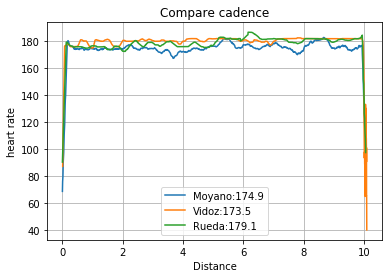

In [15]:
plt.figure(3)
N3=50
plt.title("Compare cadence")
plt.plot(data_4["distance"],smooth(data_4["cadence"],N3),label="Moyano:"+str(round(np.mean(data_4["cadence"]),1)))
plt.plot(data_3["distance"],smooth(data_3["cadence"],N3),label="Vidoz:"+str(round(np.mean(data_3["cadence"]),1)))
plt.plot(data_1["distance"],smooth(data_1["cadence"],N3),label="Rueda:"+str(round(np.mean(data_1["cadence"]),1)))
plt.xlabel('Distance')
plt.ylabel("heart rate")
plt.legend()
plt.grid()
plt.show()



## Cálculo de la VAM a partir del test
Las principales pruebas de evaluación de la VAM
- Vameval: prueba por descansillo (+0.5km/h cada minuto)
- Brue: prueba por descansillo (+ el 0.3km/h cada minuto ) pero la velocidad es dada por una bicicleta
- Prueba de 3 ' a 6 ' (con arreglo al nivel del atleta) al 100 % de sus posibilidades
- Prueba de 1000 a 2000m (con arreglo al nivel del atleta) al 100 % de sus posibilidades.
- La prueba de cooper es demasiado larga para la VAM.
Hay varias formas de estimar la VAM en función de una prueba de 10k.

## Opción 1
Usar las tabulaciones entre tiempos de 10k o 5k vs VAM

En la siguiente ref hay una relación

https://www.athlete-endurance.com/training-network/es/running/vam-y-vo2max/velocidad-aerobica-maxima-vam.html ref

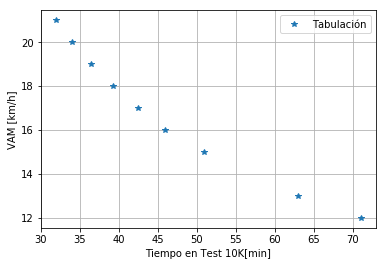

In [38]:
VAM = [12, 13, 15,16, 17, 18, 19, 20, 21]
T_10K = [71, 63, 51, 46, 42.5,39.33, 36.5,34,32]

plt.figure()
plt.plot(T_10K, VAM,'*',label ="Tabulación")
plt.xlabel('Tiempo en Test 10K[min]')
plt.ylabel("VAM [km/h]")
plt.legend()
plt.grid()
plt.show()  



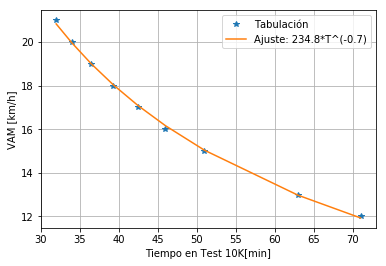

In [43]:
#Se ajusto la curva con una potencia con una tel tipo a*x^2

def VAM_test10(t):
    #Tiempo en minutos
    #Es la regresión de la anterior tabla, ingresa tu tiempo en 10 y devuelve la VAM
    return(234.88*(t**(-0.699)))
           
#fit1 = np.array
fit1 = VAM_test10(np.array(T_10K))
plt.figure()
plt.plot(T_10K, VAM,'*',label ="Tabulación")
plt.plot(T_10K, fit1,label ="Ajuste: 234.8*T^(-0.7)")
plt.xlabel('Tiempo en Test 10K[min]')
plt.ylabel("VAM [km/h]")
plt.legend()
plt.grid()
plt.show()  

In [47]:
print("El atleta A posee una VAM = ", round(VAM_test10(36+35/60),1),"km/h")
print("El atleta B posee una VAM = ", round(VAM_test10(35+48/60),1),"km/h")
print("El atleta C posee una VAM = ", round(VAM_test10(35+48/60),1),"km/h")

El atleta A posee una VAM =  19.0 km/h
El atleta B posee una VAM =  19.3 km/h
El atleta C posee una VAM =  19.3 km/h


## OPCIÓN 2
Una segunda opción sería buscar los mejores 2k dentros de los 10k y tomar esto como el 90% de la VAM.

- Según algunas lecturas uno podría correr 10k al 90% de la VAM
- ´Por otro lado los tres atletas estarían en condiciones de correr los 10k al ritmo de los mejores 2k, asumiendo cero desnivel y en pista.
